In [1]:
import main as main

In [2]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from db import dbctrl as dbc
import string
from wordcloud import WordCloud
import re
from pprint import pprint
import spacy
from spacy.lang.en import English

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import pandas as pd

In [4]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabrielarnold/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [6]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
import gensim.corpora as corpora
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gabrielarnold/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
main.run_all()

Latest Coronavirus Impacts: California to Expand Eligibility for Vaccinations
Families and Fans Can Start Buying Tix for Legoland
California to Open Vaccinations to Everyone 16 and Older Starting April 15
San Diego Councilman: City Seal's Glorification of Spanish Past No Longer Relevant
That Vaccinated Feeling: San Diegans React to Getting Their Second Dose
Oceanside Mother Pleads Not Guilty in Newborn's Death, Restraining Order Alleges History of Violence
A New Version of an Old Scam Targets Grandparents
‘Exposure': Documentary Highlights How Pandemic ‘Changed the Face of Nursing'
Family to Launch Fund to Build Pedestrian Bridge at San Diego River Crossing Commemorating Death of Son
Darvish Gets Opening Day Start for Padres
San Diego ‘Vaccine Angels' Help Neighbors Find Vaccine Appointments
Amazon Settles Lawsuit With San Diego, Other DAs Over Price Listings
Third Person Arrested in Killing of Teen at Sunset View Park in Chula Vista
FEMA Urging Applicants to Prepare Documents for COVI

'Program has sucessfully scraped and saved the data.'

### Data

In [8]:
db = dbc.show_all_data()

In [13]:
data = pd.DataFrame(db, columns=['title', 'source', 'day', 'date', 'state'])

In [6]:
titles = dbc.grab_titles()

In [7]:
titles = [re.sub("\dh$", '', i) for i in titles]

In [15]:
new_titles = titles[:11]

In [17]:
result = {}
count = 0
for title in new_titles:
    title_obj = {}
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(title)
    title_obj['nouns'] = [chunk.text for chunk in doc.noun_chunks]
    title_obj['verbs'] = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    
    result[count] = title_obj
    count += 1

In [18]:
result

{0: {'nouns': ['Alabama',
   '754 confirmed coronavirus casesThe daily update',
   'coronavirus cases',
   'Alabama'],
  'verbs': ['add', 'confirm']},
 1: {'nouns': ['Whitmire', 'LGBTQ charter school rejection'], 'verbs': []},
 2: {'nouns': ['Trump',
   'Supreme Court pick',
   'Friday',
   'SaturdayTrump',
   'reports',
   'Ruth Bader Ginsburg',
   'her granddaughter',
   'it',
   'a replacement justice'],
  'verbs': ['announce', 'disparage', 'tell', 'wish', 'confirm']},
 3: {'nouns': ['Alabama reserve cornerback', 'arm', 'injuryHe', 'the injury'],
  'verbs': ['suffer', 'suffer']},
 4: {'nouns': ['The 2020 Alabama football depth chart'], 'verbs': []},
 5: {'nouns': ['An update', 'Joey Gatewood', 'Kentucky-Auburn'],
  'verbs': ['head']},
 6: {'nouns': ['Amari Cooper’s circus catch', 'Cowboy'], 'verbs': ['check']},
 7: {'nouns': ["AL.com's SEC Insider",
   'Alabama',
   'Season PreviewSEC Insider',
   'Alabama',
   'Season Preview',
   'The wildest offseason',
   '- Offense',
   'Tua\n-

In [7]:
stop_words = set(stopwords.words('english')) | set(string.punctuation)

In [8]:
cleaned_titles = []
for i in titles:
    word_tokens = word_tokenize(i)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
            
    cleaned_titles.append(filtered_sentence)

In [9]:
cleaned_words = []
for titles in cleaned_titles:
    for words in titles:
        cleaned_words.append(re.sub(r'\dh','', words))

In [10]:
listToStr = ' '.join([str(elem) for elem in cleaned_words])

In [11]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(listToStr)

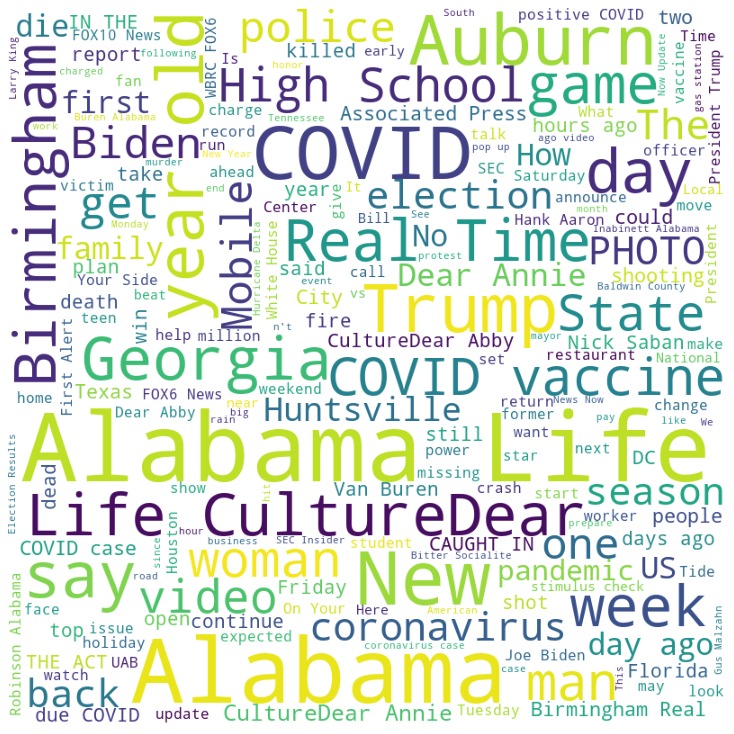

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize = (20, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
plt.savefig('wordcloud')

In [17]:
# wordcloud.to_file('alabama_wordcloud.png')

### Observing the Data that we have collected

In [13]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [28]:
no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(cleaned_words)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 20
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
life vaccine time 2020 coronavirus georgia high 10 death positive
Topic 1:
ago man election video news real days culturedear dies capitol
Topic 2:
alabama says state football national tuscaloosa texas watch atlanta help
Topic 3:
county inauguration shooting dc hank update van buren monday vaccines
Topic 4:
covid 19 police killed president game season abby houston arrested
Topic 5:
birmingham home photos pandemic mobile king say stimulus joe senate
Topic 6:
year old health robinson shot huntsville charged inabinett live coach
Topic 7:
biden day woman annie 2021 house associated harris dead world
Topic 8:
new trump auburn school people aaron head officials flanagan wbrc
Topic 9:
week cases 000 hours missing family officer area years vote


### EDA

In [15]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = cleaned_titles
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['alabama', 'adds', 'confirmed', 'coronavirus', 'casesthe', 'daily', 'update', 'coronavirus', 'cases', 'alabama']


In [16]:
# Create Corpus
id2word = corpora.Dictionary(data_words)
# Term Document Frequency
texts = data_words
# View
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1)]


In [17]:
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"covid" + 0.010*"biden" + 0.009*"new" + 0.009*"alabama" + 0.008*"ago" '
  '+ 0.007*"day" + 0.006*"says" + 0.006*"year" + 0.005*"man" + 0.005*"auburn"'),
 (1,
  '0.014*"alabama" + 0.008*"covid" + 0.007*"life" + 0.006*"day" + 0.006*"ago" '
  '+ 0.005*"new" + 0.005*"biden" + 0.005*"auburn" + 0.005*"biscuit" + '
  '0.005*"vaccines"'),
 (2,
  '0.016*"alabama" + 0.014*"covid" + 0.012*"first" + 0.008*"biden" + '
  '0.006*"county" + 0.006*"police" + 0.005*"vaccine" + 0.004*"plan" + '
  '0.004*"new" + 0.004*"auburn"'),
 (3,
  '0.016*"alabama" + 0.011*"covid" + 0.009*"aaron" + 0.009*"hank" + '
  '0.008*"life" + 0.006*"news" + 0.006*"home" + 0.005*"police" + 0.005*"year" '
  '+ 0.005*"atlanta"'),
 (4,
  '0.013*"covid" + 0.009*"alabama" + 0.007*"time" + 0.007*"county" + '
  '0.007*"birmingham" + 0.007*"ago" + 0.007*"vaccine" + 0.006*"real" + '
  '0.006*"trump" + 0.005*"high"'),
 (5,
  '0.023*"alabama" + 0.014*"county" + 0.014*"covid" + 0.007*"vaccine" + '
  '0.005*"year" + 0.005*"cas

In [21]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.083229  0.046126       1        1  11.811386
5     -0.033398 -0.011000       2        1  10.606033
4      0.090681  0.020985       3        1  10.598955
0      0.079200 -0.038029       4        1  10.091911
2     -0.006859 -0.053033       5        1   9.980518
3     -0.024095  0.113175       6        1   9.948083
7     -0.008527 -0.128635       7        1   9.657633
1     -0.091521 -0.006688       8        1   9.198919
9      0.008903  0.029390       9        1   9.130564
8     -0.097613  0.027709      10        1   8.975997, topic_info=        Term        Freq       Total Category  logprob  loglift
333    first  153.000000  153.000000  Default  30.0000  30.0000
8431   aaron  133.000000  133.000000  Default  29.0000  29.0000
8432    hank  130.000000  130.000000  Default  28.0000  28.0000
8509  braves   37.000000   37.000000  Default  27.0000  27.0000
29     trump  240.000000  240.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
129   county   22.517161  322.119679  Topic10  -5.4523  -0.2500
29     trump   20.015485  240.738192  Topic10  -5.5701  -0.0766
431      new   18.221338  219.873286  Topic10  -5.6640  -0.0798
367      man   18.206320  239.143979  Topic10  -5.6649  -0.1647
43    auburn   15.823876  190.423882  Topic10  -5.8051  -0.0771

[817 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
8431      1  0.037430   aaron
8431      2  0.022458   aaron
8431      3  0.022458   aaron
8431      4  0.059888   aaron
8431      5  0.067374   aaron
...     ...       ...     ...
1195      9  0.105439   years
1195     10  0.225941   years
8236      4  0.870200  yellen
8236      8  0.145033  yellen
7374     10  0.876377     yes

[2346 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 5, 1, 3, 4, 8, 2, 10, 9])

In [8]:
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gabrielarnold/nltk_data...


In [12]:
for headline in titles:
    print(headline)
    ss = sia.polarity_scores(headline)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Alabama adds 754 confirmed coronavirus casesThe daily update on coronavirus cases in Alabama.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Whitmire: LGBTQ charter school rejection is unacceptable
compound: -0.7579, neg: 0.565, neu: 0.435, pos: 0.0, 
Trump to announce Supreme Court pick on Friday or SaturdayTrump disparaged reports that Ruth Bader Ginsburg had told her granddaughter it was her wish that a replacement justice not be confirmed until the ...
compound: 0.8074, neg: 0.058, neu: 0.706, pos: 0.236, 
Alabama reserve cornerback suffers arm injuryHe suffered the injury last week.
compound: -0.8442, neg: 0.532, neu: 0.468, pos: 0.0, 
The 2020 Alabama football depth chart
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
An update on Joey Gatewood heading into Kentucky-Auburn
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Check out Amari Cooper’s circus catch for Cowboy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
AL.com's SEC Insider: Alabama 2020 Season PreviewSEC Insider: Alabama 2

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
What is this feral hog dragging through the Alabama woods?The grainy image shows the hog — eyes aglow — with something wispy in its mouth. The object’s long legs — or tentacles — are seen trailing on the ...
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
CDC changes coronavirus testing guidelines again
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama 1 of 12 states with 35% obesity rateThe data comes from an ongoing, state-based telephone interview survey conducted by the CDC and state health departments.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Will Alabama archives move past its days as the attic of Confederacy?“If history is to serve the present, it must offer an honest assessment of the past,” Director Steve Murray and trustees said in a “statement of ...
compound: 0.5574, neg: 0.0, neu: 0.884, pos: 0.116, 
Alabama NFL roundup: Falcons lose despite Calvin Ridley1
compound: -0.4019, neg: 0.278, neu: 0.722, pos: 0.0, 
‘Forrest Gu

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ivey, Harris sued over mask order, other COVID issues2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jerry Jeudy, Broncos pushing on despite injuriesThe former Alabama All-American has caught eight passes in his first two NFL games.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Head 2 Head: Auburn vs. Kentucky
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Nick Saban to players: Are you lions or greyhounds?How is Saban trying to motivate his players to perform in mostly-empty stadiums this season?1
compound: 0.4515, neg: 0.0, neu: 0.881, pos: 0.119, 
Tom Hanks shares new ‘Forrest Gump’ set storiesThe Oscar-winner paid to shoot key scenes from his own pocket.
compound: -0.0516, neg: 0.117, neu: 0.777, pos: 0.107, 
Robins & Morton begin work on Florida healthcare project
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Roadside Jesus statue is Alabama man’s message of love
compound: 0.6369, neg: 0.0, neu: 0.656, pos: 0.344, 
Charles Barkley blast

compound: -0.5461, neg: 0.175, neu: 0.775, pos: 0.05, 
Walmart announces initial Black Friday plansWalmart has outlined some of its Black Friday plans.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Auburn's Gus Malzahn recaps Kentucky win, previews GeorgiaGus Malzahn speaks with reporters the day after his Auburn Tigers took down Kentucky in the 2020 season opener. (Auburn Athletics)1
compound: 0.5859, neg: 0.0, neu: 0.877, pos: 0.123, 
Dwayne Johnson endorses Joe Biden, Kamala Harri
compound: 0.34, neg: 0.0, neu: 0.714, pos: 0.286, 
Anniston removes Confederate monument in dead of night
compound: -0.6486, neg: 0.381, neu: 0.619, pos: 0.0, 
College football TV schedule for Week 5 of 2020 seasonAlabama hosts Texas A&M; Auburn plays at Georgia
compound: 0.25, neg: 0.0, neu: 0.882, pos: 0.118, 
We can insist lawmakers address guns
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Man nabbed after 2-day Jeffco crime spree
compound: -0.5423, neg: 0.368, neu: 0.632, pos: 0.0, 
Baldwin County stu

compound: 0.4215, neg: 0.0, neu: 0.833, pos: 0.167, 
Another judge delivers blow to USPS, says changes put election mail 'at risk'
compound: -0.2732, neg: 0.149, neu: 0.851, pos: 0.0, 
NFL legend Joe Montana tussles with woman who attempted to kidnap his grandchild, police say
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama Power offers new payment plans during pandemic
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Medical experts say face covering mandate still needed in Alabama
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Memorial to Confederate war hero John Pelham removed from Anniston
compound: -0.0772, neg: 0.252, neu: 0.516, pos: 0.232, 
Missing child alert canceled for Montgomery 10-year-old
compound: 0.0, neg: 0.234, neu: 0.532, pos: 0.234, 
Gadsden city workers head out to Baldwin County to assist in hurricane cleanup
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Three killed in Northern California wildfire; thousands flee
compound: -0.6705, neg: 0.391, neu: 0.609, pos

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Argument over parking spaces in Bham leaves 1 dead, 2 injure
compound: -0.7783, neg: 0.493, neu: 0.507, pos: 0.0, 
Alabama lawsuit over masks ordered to change venue
compound: -0.2263, neg: 0.213, neu: 0.787, pos: 0.0, 
Hear what Jaylen Waddle and Christian Harris had to say as Bama looks ahead to Week 2 vs Texas A&M
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Submit your Georgia questions to Malzahn for Tiger Talk
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Hear what Nick Saban had to say Monday following Alabama's win over Mizzou
compound: 0.5859, neg: 0.0, neu: 0.759, pos: 0.241, 
Hear what Nick Saban had to say Monday following Alabama's win over MizzouAlabama head coach Nick Saban addresses the media following the Tide's season opening win over Mizzou, as the team looks ahead to week 2 vs Texas A&M
compound: 0.8225, neg: 0.0, neu: 0.826, pos: 0.174, 
Cullman County man charged with beating 3-year-old girl
compound: -0.5859, neg: 0.

Investigative reporter Brendan Kirby talks about upcoming deadline for stimulus program
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
With hospitals filling, Alabama officials explore ‘pop-up hospitals’
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Five possible reasons why COVID-19 deaths might be declining
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In the Kitchen: Turkey Meatloaf Burgers
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Grab your clubs for "Tee Time for Autism"
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Daryl Myers Music for Suicide Prevention Month and Mental Health Awareness
compound: -0.6705, neg: 0.31, neu: 0.69, pos: 0.0, 
Perspectives: Southwest Alabama Partnership for Training and Employment
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Perspectives: The Plight of Farmers
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Perspectives: Master Plan for Brookley - Hopes and Concerns
compound: 0.4215, neg: 0.0, neu: 0.714, pos: 0.286, 
We believe in masks that are c

compound: 0.4588, neg: 0.0, neu: 0.9, pos: 0.1, 
SNL’s funniest presidential debate sketche
compound: 0.5574, neg: 0.0, neu: 0.526, pos: 0.474, 
Check out construction on the Buc-ee's gas station off Interstate 20 in Leeds, Alab
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ASWA Prep Rankings: Familiar face returns to No. 1Defending state champion Oxford returned to the No. 1 spot in Class 6A in this week's Alabama Sports Writers Association prep football rankings.
compound: 0.128, neg: 0.125, neu: 0.765, pos: 0.11, 
Southern States Roast Each OtherWe brought in one person from each of the Southern states and asked them what they liked (and disliked) about each other. Apologies in advance to ...
compound: 0.4215, neg: 0.0, neu: 0.915, pos: 0.085, 
Incredible last-second scramble play leads to Hillcrest-Tuscaloosa 34-28 win over WetumpkaHillcrest-Tuscaloosa trailed Wetumpka 30-28 with 2.9 seconds left on its own 41-yard line when coach Sam Adams called for a play the Patriots run ...
co

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stay Connected to WBRC FOX6 News
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Listen to Behind the Front, 6 Off Script, Mike Behind the Mic, and The Kurre and Klapow Show
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Get Up with Good Day Alabama Weekdays 4-10 AM See what you my have missed here
compound: 0.1779, neg: 0.115, neu: 0.733, pos: 0.152, 
iHeart Radio Stations
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Biden, Trump snipe from road and rails after debate chaos
compound: -0.5719, neg: 0.291, neu: 0.709, pos: 0.0, 
COVID-19 map data suggests mask mandate is working
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Flu vaccination drive-thru hosted in Calhoun Co.
compound: -0.3818, neg: 0.302, neu: 0.698, pos: 0.0, 
Judge orders changes to Alabama voting laws amid pandemic
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gov. Ivey apologizes after attorney, 16th Street Baptist Church bombing victim ask for apology and compensation
compou

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
How ex-Auburn DB has become one of nation’s top RB coaches“You see he’s on the rise. And it doesn’t surprise me.”1
compound: 0.4404, neg: 0.0, neu: 0.83, pos: 0.17, 
Man shot to death outside Birmingham apartment building now identified1
compound: -0.5994, neg: 0.302, neu: 0.698, pos: 0.0, 
What we’ll miss most about tailgating at AlabamaThere's a ban on tailgating at UA this season because of COVID-19.1
compound: -0.6369, neg: 0.245, neu: 0.755, pos: 0.0, 
Hear what Nick Saban had to say Wednesday ahead of Alabama's home opener vs Texas A&M
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dear Annie: My husband has no interest in me but I know he trolls the internet looking for sex
compound: 0.296, neg: 0.078, neu: 0.735, pos: 0.186, 
Joe Biden and Jill Biden test negative for coronavirusThe Democratic presidential nominee and his wife were tested earlier in the day after news of President Donald Trump’s infection was announced.
compound: -0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The Bitter Socialite: Cantaloupe Martini
compound: -0.4215, neg: 0.412, neu: 0.588, pos: 0.0, 
Alabama high school Culinary team has a recipe that is out of this world
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bitter Socialite: Squash Blossoms
compound: -0.4215, neg: 0.483, neu: 0.517, pos: 0.0, 
Incredible last-second scramble play leads to Hillcrest-Tuscaloosa 34-28 win over Wetumpk
compound: 0.7351, neg: 0.0, neu: 0.592, pos: 0.408, 
New on Netflix: October 2020Here are the new movies and shows you can stream in October.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Preakness Stakes 2020 live stream: Watch onlineThe 145th Preakness Stakes has a scheduled post time of 4:45 p.m. CDT Saturday.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kolbi Fuqua gets pick-6 for Jacksonville State vs. Florida State30m
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
SEC Football by the Numbers: Top 10 for Week 22
compound: 0.2023, neg: 0.0, neu: 0.833,

compound: -0.6369, neg: 0.375, neu: 0.625, pos: 0.0, 
Some Prichard city employees finally receive paycheck but find holiday pay, overtime and even regular hours still short
compound: 0.4497, neg: 0.076, neu: 0.757, pos: 0.168, 
Trump diagnosis could spark public reassessment, Mobile health workers say
compound: 0.2263, neg: 0.0, neu: 0.826, pos: 0.174, 
Kellyanne Conway says she has tested positive for COVID-19
compound: 0.5574, neg: 0.0, neu: 0.69, pos: 0.31, 
ALEA urges Alabamians to obtain STAR ID
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Concerning signs despite word Trump is doing 'very well'
compound: 0.3384, neg: 0.0, neu: 0.77, pos: 0.23, 
A quiet weekend forecast
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
MPD Overnight Crime Recap: Officers responded to three overnight shootings in different locations
compound: -0.5423, neg: 0.226, neu: 0.774, pos: 0.0, 
At least 11 positive coronavirus tests stemmed from presidential debate, Cleveland officials say
compound: 0.5574, n

compound: -0.4717, neg: 0.085, neu: 0.915, pos: 0.0, 
Can Doug Jones pull off another electoral upset?Sen. Doug Jones is considered the Senate’s most endangered Democrat because he represents a state that, aside from his victory in 2017, had not ...
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Incredible last-second scramble play leads to Hillcrest-Tuscaloosa 34-28 win over WetumpkaHillcrest-Tuscaloosa trailed Wetumpka 30-28 with 2.9 seconds left on its own 41-yard line when coach Sam Adams called for a play the Patriots run ...
compound: 0.8225, neg: 0.0, neu: 0.783, pos: 0.217, 
Kat West death: Murder trial for husband Jeff West continued again47m
compound: -0.8625, neg: 0.489, neu: 0.511, pos: 0.0, 
Julio Jones sets Atlanta Falcons’ receptions record1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Finebaum, Cole Cubelic sound off on Auburn l
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mobile council, mayor to see raises after 2021 election9m
compound: 0.0, neg: 0.0, neu: 1.0, pos:

No-kill animal shelter in Calhoun County has fundraising issues due to COVID-19
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama health leaders continue push for everyone to get a flu shot
compound: -0.3818, neg: 0.206, neu: 0.794, pos: 0.0, 
B’ham police searching for armed robbery suspect
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
ADPH: Alabama COVID numbers improving, but ‘still not where we’d like to be’
compound: -0.1938, neg: 0.171, neu: 0.707, pos: 0.122, 
Trump court nomination hangs over Senate shuttered by virus
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Walker Co. man charged with animal cruelty after 1 horse euthanized, 9 others removed from property
compound: -0.6908, neg: 0.322, neu: 0.678, pos: 0.0, 
3 people killed in crash in West Alabama Saturday
compound: -0.802, neg: 0.545, neu: 0.455, pos: 0.0, 
Police: 16-year-old faces multiple charges after crashing stolen SUV into patrol car following pursuit
compound: -0.6486, neg: 0.306, neu: 0.694, pos: 0.0

Good news for Amazon: Prime Day just turned into a holiday shopping event
compound: 0.743, neg: 0.0, neu: 0.552, pos: 0.448, 
CAUGHT IN THE ACT: Laundromat coin thieves
compound: -0.5106, neg: 0.355, neu: 0.645, pos: 0.0, 
CAUGHT IN THE ACT: Armed Robbery at Jets Convenience Store
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
CAUGHT IN THE ACT: Suspect identified in car break-ins
compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
Investigative reporter Brendan Kirby talks about upcoming deadline for stimulus program
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
With hospitals filling, Alabama officials explore ‘pop-up hospitals’
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Five possible reasons why COVID-19 deaths might be declining
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mobtown Burger Week to help Restore Mobile
compound: 0.5994, neg: 0.0, neu: 0.505, pos: 0.495, 
Ghost Hunting: True Tales of the Paranormal
compound: 0.128, neg: 0.228, neu: 0.495, pos: 0.277, 
Previewing Per

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama opens as 3-score favorite over Tennessee2
compound: 0.4588, neg: 0.0, neu: 0.667, pos: 0.333, 
LSU QB Myles Brennan dealing with ‘significant’ injury
compound: -0.4215, neg: 0.286, neu: 0.714, pos: 0.0, 
Police: Man says he has COVID, coughs on cop43m
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Saban loved celebration, hates idea of big wins feeling routineThere was an emotional release following Alabama's win over Georgia on Saturday night.
compound: 0.891, neg: 0.087, neu: 0.479, pos: 0.434, 
How the evacuation of a nursing home in Alabama spread coronavirusIn July, a nursing home overcome by coronavirus evacuated patients to Trussville, where the virus followed
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dear Annie: My wife has lost interest in being intimate and I’m nearing the end of my rope1
compound: 0.5106, neg: 0.1, neu: 0.655, pos: 0.245, 
Dear Abby: Man’s distaste for girlfriend’s daughter, old photos, puts relationsh

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Get Up with Good Day Alabama Weekdays 4-10 AM See what you my have missed here
compound: 0.1779, neg: 0.115, neu: 0.733, pos: 0.152, 
iHeart Radio Stations
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Confirmed COVID-19 cases worldwide passes 40 million; new strategies target hot spots
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sumiton man has message after 69 days in hospital battling COVID-19
compound: -0.2732, neg: 0.174, neu: 0.826, pos: 0.0, 
Shelby Co. officials search for missing teen
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
Shipt shoppers protest over company actions they say interfere with wages
compound: -0.25, neg: 0.167, neu: 0.833, pos: 0.0, 
Cullman family pushes for legislative change after uncle’s murder
compound: -0.6908, neg: 0.37, neu: 0.63, pos: 0.0, 
UAB creates drop-in study program for remote learning children and working parents
compound: 0.2732, neg: 0.0, neu: 0.84, pos: 0.16, 
‘Please walk in my sho

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
SEC winners and losers of Week 4Every Monday, AL.com takes a look at the good and bad of the week in the SEC.
compound: -0.2263, neg: 0.223, neu: 0.583, pos: 0.194, 
Saban: Dylan Moses played ‘extremely well’ vs. Georgia
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 
Patrick Surtain and Najee Harris address the media Monday ahead of Alabama's trip to Tennessee
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
For one Alabama senator, too little daycare regulation is still too much
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Hit and RunHit and Run video from Birmingham police6m
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
SEC Insider: Alabama rocks Georgia to sleep, 41-24: Nick outsmarts Kirby
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Doctor sentenced to 15 years in pill mill caseRichard A. Stehl, 60, was convicted in December 2019 on 94 counts of unlawfully distributing controlled substances, two counts of health care fraud, ...
comp

compound: -0.6249, neg: 0.451, neu: 0.549, pos: 0.0, 
Watching the Tropics
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dead animal, brick with a name left at congressman's house
compound: -0.6486, neg: 0.35, neu: 0.65, pos: 0.0, 
Voters could remove racist phrases from Alabama Constitution
compound: -0.6124, neg: 0.364, neu: 0.636, pos: 0.0, 
Truck driver killed in traffic accident on I-10 near Theodore Dawes Road identified
compound: -0.8225, neg: 0.409, neu: 0.591, pos: 0.0, 
The readers that adjust to your every activity.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
MCPSS juggles daily changes as they return to class
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In the Kitchen: PB&J; and Banana Burrito
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
McConnell says 'no concerns' despite visible bandages and bruises
compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
STREAMING NOW: PEOPLE (the TV Show!)
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Perspectives: Jury Trials Resume
c

compound: -0.2023, neg: 0.184, neu: 0.816, pos: 0.0, 
Mobile Real-Time NewsDriver of 18-wheeler dies in fiery Mobile crashWilliam Thornton, 
compound: -0.34, neg: 0.194, neu: 0.806, pos: 0.0, 
Alabama Life & CultureDolly Parton brings Stephen Colbert to tears with songBen Flanagan
compound: -0.2263, neg: 0.147, neu: 0.853, pos: 0.0, 
PoliticsPresidential debate fact check: examining claims from last Trump-Biden debateThe Associated Press, 2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
HurricaneHigh chance tropical depression forms in Gulf next weekLeigh Morgan, 
compound: -0.4019, neg: 0.27, neu: 0.584, pos: 0.146, 
NewsSold into slavery in Alabama, he escaped and fought in the Civil WarJim Meenan Moline Dispatch and Rock Island Argus, Ill., 1
compound: -0.7964, neg: 0.272, neu: 0.728, pos: 0.0, 
5h  U.S. Sen. Doug Jones votes today in Birmin
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Birmingham Real-Time NewsWoman dead, man critically injured in east Birmingham house fireBirmingha

compound: 0.34, neg: 0.0, neu: 0.821, pos: 0.179, 
Oaklawn Day of Caring
compound: 0.4939, neg: 0.0, neu: 0.484, pos: 0.516, 
A 20-year-old woman cast her ballot early before dying of cancer. Her state will throw it out.
compound: -0.6597, neg: 0.227, neu: 0.773, pos: 0.0, 
A better way to sanitize has arrived.
compound: 0.4404, neg: 0.0, neu: 0.633, pos: 0.367, 
Senate race between Jones, Tuberville tops Alabama ballot
compound: 0.5106, neg: 0.0, neu: 0.68, pos: 0.32, 
Infection Disease Doctor: We're running out of beds
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
You Decide 2020: Alabama Amendments 1-3
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A Florida fisherman caught a gator he'd been watching for three years. It weighed more than 1,000 pounds
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
U.S. Navy is near completion of an environmental cleanup after plane crash in Foley
compound: -0.4019, neg: 0.172, neu: 0.828, pos: 0.0, 
Video from oil rig shows 50-foot waves in Gulf durin

Alabama Life & CultureSean Connery, actor and James Bond star, dies at age 90Mary Colur
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Auburn FootballAn update on injured Auburn All-SEC LB K.J. BrittMatt Zenitz, 
compound: -0.4019, neg: 0.213, neu: 0.787, pos: 0.0, 
Auburn FootballAuburn re-enters both polls following romp of LSUTom Green, 1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama Life & CultureDear Annie: I just don’t know what to do about my husband anymoreAnnie Lane
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Auburn FootballWhat Ed Orgeron said about Auburn’s win over LSUGiana Han
compound: 0.5859, neg: 0.0, neu: 0.725, pos: 0.275, 
New backlog adds 1,700 coronavirus cases in Alabama for second consecutive day
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama Life & CultureDear Annie: I’m worried that my boyfriend wants to get married but won’t discuss serious topics like finances and religion firstAnnie Lane
compound: 0.296, neg: 0.112, neu: 0.769, pos: 0.119, 
A

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
CAUGHT IN THE ACT: Car break-ins; Suspect purchases tires with stolen credit card
compound: -0.4215, neg: 0.3, neu: 0.556, pos: 0.144, 
On a mission to keep you cool and safe.
compound: 0.6369, neg: 0.0, neu: 0.536, pos: 0.464, 
Tuberville unseats Jones
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
$60 million settlement with Terminix over illegal business practices targeting Alabamians
compound: -0.5574, neg: 0.265, neu: 0.735, pos: 0.0, 
MPD: Woman dies in traffic crash; man facing manslaughter charge
compound: -0.4019, neg: 0.231, neu: 0.769, pos: 0.0, 
KMB celebrates 'America Recycles Day' with E-cycling and shredding event
compound: 0.5719, neg: 0.0, neu: 0.709, pos: 0.291, 
Spring Hill College adds free, flexible textbook use
compound: 0.6369, neg: 0.0, neu: 0.536, pos: 0.464, 
Why mail-in ballots in Michigan, Wisconsin and Pennsylvania were counted so late
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11:14
compound: 0.0, neg: 0.0, n

compound: -0.8481, neg: 0.279, neu: 0.721, pos: 0.0, 
Alabama FootballA few interesting things Tide players said in open weekMichael Casagrande
compound: 0.4019, neg: 0.0, neu: 0.803, pos: 0.197, 
2h  Alabama reaches 'historic' settlement with Terminix
compound: 0.0516, neg: 0.0, neu: 0.833, pos: 0.167, 
NewsDemonstrations continue against presidential vote counts in Michigan, ArizonaThe Associated Press, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
HurricaneTropical Depression Eta path shifts westwardLeigh Morgan, 
compound: -0.5719, neg: 0.381, neu: 0.619, pos: 0.0, 
Alabama FootballDeVonta Smith, Mac Jones tops in PFF rankingMark Hei
compound: 0.5106, neg: 0.0, neu: 0.732, pos: 0.268, 
Alabama Life & CultureMick Jagger releases clip of new anti-Trump songMatt Wake
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama Life & CultureDear Abby: Pandemic causing ‘serious disconnect’ in couple’s marriageAbigail Van Buren
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama Life & Cult

compound: -0.0516, neg: 0.033, neu: 0.967, pos: 0.0, 
NewsGadsden woman claims neighbor steals water through hoseDonna Thornton  The Gadsden Times, Ala.
compound: -0.5106, neg: 0.216, neu: 0.784, pos: 0.0, 
1h  First Black CEO of Birmingham Business Alliance steps down
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Auburn FootballWhat Gus Malzahn said on Tiger TalkGiana Han, 2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama FootballFlorida Man Mullen embracing Spurrier role for UGAJoseph Goodman
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama Life & CultureDear Abby: Gift money sent to grandson gets used to pay down his chore debtAbigail Van Buren
compound: 0.3612, neg: 0.066, neu: 0.798, pos: 0.136, 
NewsBiden vs. Trump would have had 10 times the bets of Super BowlEd Barkowitz  The Philadelphia Inquirer, 
compound: 0.5994, neg: 0.0, neu: 0.804, pos: 0.196, 
3h  Steve Bannon’s account suspended from Twitter permanently
compound: -0.4767, neg: 0.307, neu: 0.693, pos: 0.0, 
A

compound: -0.8442, neg: 0.532, neu: 0.468, pos: 0.0, 
Gov. Ivey extends Safer at Home order until December
compound: 0.5106, neg: 0.0, neu: 0.619, pos: 0.381, 
BBJ: Amazon to open two new facilities in metro Birmingham
compound: 0.1779, neg: 0.0, neu: 0.841, pos: 0.159, 
Biden on cusp of presidency after gains in Pennsylvania
compound: 0.34, neg: 0.0, neu: 0.769, pos: 0.231, 
Get WBRC FOX6 News on Your Streaming Device
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Machine error blamed for ‘missing’ absentee ballot problem in Tuscaloosa County
compound: -0.8625, neg: 0.602, neu: 0.398, pos: 0.0, 
Stay Connected to WBRC FOX6 News
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jefferson Co. coroner looking for family of man killed when his car went off I-59/20
compound: -0.6705, neg: 0.243, neu: 0.757, pos: 0.0, 
Georgia judge dismisses lawsuit by Trump campaign
compound: -0.2263, neg: 0.241, neu: 0.759, pos: 0.0, 
Trump hits election integrity as votes still being counted
compound: 0.3818

compound: -0.5859, neg: 0.375, neu: 0.625, pos: 0.0, 
Birmingham Real-Time NewsFirst Black CEO of Birmingham Business Alliance steps downDennis Pillion
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2h  Biden speech will cause ND-Clemson to change channel
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
PoliticsHow to watch President-elect Joe Biden’s victory speech tonightGeoff Herbert, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Eta continues to strengthen in Caribbean
compound: 0.3182, neg: 0.0, neu: 0.685, pos: 0.315, 
NewsJake Tapper uses Tuberville’s football metaphors against himBen Flanagan
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Whitmire: Let's never do anything like this again
compound: -0.2755, neg: 0.232, neu: 0.768, pos: 0.0, 
SportsRavens turn to D.J. Fluker after All-Pro’s injuryMark Inabinett, 1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
SportsIs more playing time ahead for Jaguars’ Daniel Thomas?Mark Inabinett, 
compound: 0.2716, neg: 0.0, neu: 0.811, pos: 0.18

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
School nurses recap after one week using statewide K-12 COVID-19 school dashboard
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tuscaloosa VA Medical Center hosting drive thru flu clinic
compound: -0.3818, neg: 0.245, neu: 0.755, pos: 0.0, 
Organizers prepared to enforce safety measures at Funk Fest at Legion Field
compound: 0.5719, neg: 0.0, neu: 0.68, pos: 0.32, 
Hoover schools in need of substitute teachers
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ADPH announces plan for COVID-19 vaccine
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Birmingham Water Works not planning on raising rates in 2021
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Birmingham City Schools prepare to welcome students into classrooms
compound: 0.4588, neg: 0.0, neu: 0.727, pos: 0.273, 
Alabama running back Trey Sanders hurt in car accident
compound: -0.7579, neg: 0.481, neu: 0.519, pos: 0.0, 
Voter fraud concerns in Alabama? Officials say ‘no’
compound: -0.5859,

compound: -0.9186, neg: 0.565, neu: 0.435, pos: 0.0, 
Photos, video show celebrations in cities across US after Joe Biden victory
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Not all businesses benefit from new safer at home order
compound: 0.0823, neg: 0.187, neu: 0.602, pos: 0.211, 
Search and rescue dogs train for certification in Colbert County
compound: 0.5106, neg: 0.0, neu: 0.732, pos: 0.268, 
Pharmacy in Florence closed by state board
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
YOUR PHOTOS: Sun halo, tangental arcs spotted in the sky Wednesday
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Activist writes open letter to Marshall County commissioner chairman, personnel board about sit-in confrontation
compound: -0.3182, neg: 0.15, neu: 0.85, pos: 0.0, 
‘I could not be prouder,’ Obama, other U.S. politicans congratulate President-elect Biden on victory
compound: 0.4939, neg: 0.0, neu: 0.802, pos: 0.198, 
Two arrested after police find drugs, stolen motorcycle at Decatur home
co

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
News Now Update for Monday Nov. 9, 2020 from FOX10 News
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
CAUGHT IN THE ACT: Car break-ins; Suspect purchases tires with stolen credit card
compound: -0.4215, neg: 0.3, neu: 0.556, pos: 0.144, 
Decorating for the Holidays with Barrow Fine Furniture
compound: 0.5267, neg: 0.0, neu: 0.577, pos: 0.423, 
Studio 10
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
VIDEO: Executive producer of 'Jeopardy!' speaks about Alex Trebek's passing
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tracking T.S. Eta
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
71-year-old Atmore man killed in motorcycle crash
compound: -0.802, neg: 0.59, neu: 0.41, pos: 0.0, 
VIDEO: Alex Trebek, long-running 'Jeopardy!' host, dies at 80
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A treat for the eyes.
compound: 0.4019, neg: 0.0, neu: 0.526, pos: 0.474, 
+2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Operations temporarily suspended 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Here’s who has been named to President-elect Biden’s COVID-19 advisory board
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Activist writes open letter to Marshall County commissioner chairman, personnel board about sit-in confrontation
compound: -0.3182, neg: 0.15, neu: 0.85, pos: 0.0, 
Fyffe bucking bulls to compete in 2020 PBR World Finals
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Morgan County mother sentenced to 723 years in prison for rape, torture of family
compound: -0.9186, neg: 0.565, neu: 0.435, pos: 0.0, 
Reward offered for Arab city park vandals
compound: 0.5719, neg: 0.0, neu: 0.619, pos: 0.381, 
Nursing home COVID-19 cases rise four-fold in surge states
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2020 Santa’s Village moves to Early Works Children’s Museum for Ten Nights of Santa
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
HUD Secretary Ben Carson tests positive for coronavirus
compound: 0.5574, neg: 0.0, neu: 0.66, pos

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Instagram influencer Alexis Sharkey was found dead near a Houston interstate, police say
compound: -0.6486, neg: 0.281, neu: 0.719, pos: 0.0, 
Jessica Simpson Reveals She's Dyslexic and Her Struggles with Reading Out Loud
compound: -0.3612, neg: 0.185, neu: 0.815, pos: 0.0, 
Vital Juice Co.
compound: 0.296, neg: 0.0, neu: 0.476, pos: 0.524, 
Suspect identified after shooting on Texas Street
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
PHOTOS: NASA-SpaceX launch
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
+13
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The Order of Many Faces cancels Mardi Gras parade, ball
compound: -0.2263, neg: 0.174, neu: 0.826, pos: 0.0, 
FDA chief meets with Meadows again as Trump remains frustrated with pace of vaccine approval
compound: -0.0772, neg: 0.174, neu: 0.667, pos: 0.159, 
Woman killed in single-vehicle crash in Jefferson Co.
compound: -0.802, neg: 0.545, neu: 0.455, pos: 0.0, 
How Marty’s GM mad

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Turkey trot honors Florence man who passed away in October
compound: 0.5106, neg: 0.0, neu: 0.732, pos: 0.268, 
Madison County Schools to hire instructional COVID-relief aides, increase substitute pay
compound: 0.2263, neg: 0.11, neu: 0.709, pos: 0.181, 
Frigid start to Tuesday and no warm-up in sight!
compound: -0.3595, neg: 0.238, neu: 0.762, pos: 0.0, 
Naked stranger, feces-covered walls found inside Tennesse home
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Man faces charges after hitting Marshall County deputy’s vehicle
compound: -0.2732, neg: 0.208, neu: 0.792, pos: 0.0, 
Morgan County Jail, Sheriff’s Office phones down
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
CDC issues holiday travel guidance: Stay home or get tested twice
compound: 0.4019, neg: 0.0, neu: 0.787, pos: 0.213, 
Boaz Christmas parade canceled
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama School District Shares Experience with Cyber Attack
compound: -0.2263

compound: -0.4215, neg: 0.203, neu: 0.797, pos: 0.0, 
Women's Team, US Soccer Settle Part of Their Lawsuit
compound: -0.2263, neg: 0.192, neu: 0.808, pos: 0.0, 
Hidden History Weekend Starts Friday in West Virginia
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Your 2020 Fireworks Finder: How to Safely Watch in DC, Maryland, Virginia
compound: 0.4939, neg: 0.0, neu: 0.775, pos: 0.225, 
Virginia Ski Resort Opens With $1M in Upgrades
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Man Who Fell Through NYC Sidewalk Into Nest of Rats ‘the Size of Puppies' Files Suit
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mysterious Shiny Monolith Found in Otherworldly Utah Desert
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Police Accuse Maryland Man of Spraying Women in Stores
compound: -0.2023, neg: 0.184, neu: 0.816, pos: 0.0, 
New DNA information leads police to serial rape suspect in Virginia nearly 30 years later  5 hours ago
compound: -0.7845, neg: 0.315, neu: 0.685, pos: 0.0, 
Britain authoriz

compound: -0.296, neg: 0.145, neu: 0.855, pos: 0.0, 
Alabama FootballHow Alabama teammates explained Najee Harris hurdleMichael Casagrande, 2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama FootballWhat they’re saying nationally after Alabama stomps IrishMichael Casagrande, 1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
NewsFormer Blackwater contractor 'dumbfounded' by Trump pardonThe Associated Press, 1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Basketball in AlabamaAlabama upsets No. 7 Tennessee in key SEC road winMike Rodak, 
compound: -0.5719, neg: 0.32, neu: 0.68, pos: 0.0, 
Alabama Life & CultureDear Abby: Man’s effort to get to know his birth family ends in disappointmentAbigail Van Buren
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama Life & Culture50 songs from 2020 to know by Alabama musiciansMatt Wake
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7h  McConnell, Pelosi homes vandalized after $2,000 relief fail
compound: -0.1027, neg: 0.257, neu: 0.515, pos: 0.

compound: 0.4767, neg: 0.0, neu: 0.744, pos: 0.256, 
Alabama Life & CultureDear Abby: Husband’s ‘platonic’ relationship with his ex includes talks about his sex lifeAbigail Van Buren
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama FootballHere’s what they're saying about Alabama-Ohio StateMark Heim, 2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama FootballAlabama’s ‘Holy Trinity’ takes aim at historyJoseph Goodman
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
SportsOn fire’ Calvin Ridley chasing NFL receiving crownMark Inabinett, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama FootballInjury updates for Alabama’s Malachi Moore, Christian HarrisMichael Casagrande
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama Life & CultureDear Annie: How do I apologize for accidentally mirroring someone else’s accent?Annie Lane
compound: -0.25, neg: 0.152, neu: 0.759, pos: 0.089, 
SportsTom Herman out as Texas head football coachCreg Stephenson, 1
compound: 0.0, neg: 0.0, neu

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In Georgia, Biden's Presidency Meets Early Defining Moment
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Nationwide COVID Memorial Announced as Part of Biden Inauguration
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5 Things to Know About Kathleen Hicks, Biden's No. 2 Defense Pick
compound: -0.1779, neg: 0.188, neu: 0.684, pos: 0.128, 
Trump Push on $2K Checks Flops as GOP-Led Senate Won't Vote
compound: -0.34, neg: 0.194, neu: 0.806, pos: 0.0, 
The Legacy of 2020: Riches for the Wealthy and White, Financial Pain for Others
compound: 0.3818, neg: 0.163, neu: 0.545, pos: 0.292, 
EXPLAINER: Stakes High for U.S. Senate Runoffs in Georgia
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
UK Judge to Rule on US Extradition for WikiLeaks' Assange
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
U.S. Airlines' 2020 Losses Expected to Top $35 Billion as Pandemic Threatens Another Difficult Year
compound: -0.7184, neg: 0.379, neu: 0.534, pos: 0.087, 
Amer

compound: -0.2263, neg: 0.203, neu: 0.654, pos: 0.144, 
NewsJust engaged, Hannah Ford dies in crash after visit to wedding venueHannah Ford, 26, worked as communications coordinator on Birmingham Evangelist Scott Dawson’s 2018 campaign for governor.Greg Garrison, 
compound: 0.0, neg: 0.086, neu: 0.828, pos: 0.086, 
Alabama Life & CultureDid you spot ‘Forrest Gump’ celebrating Alabama’s win in Tuscaloosa?Ben Flanagan
compound: 0.8176, neg: 0.0, neu: 0.595, pos: 0.405, 
2h  Sen. Tommy Tuberville will attend Joe Biden inauguration
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2h  Soldier allegedly plotted to blow up New York City’s 9/11 Memorial
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1h  NCAA tournament goes to modified schedule for 2021
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
50m  Conn’s HomePlus store opens first south Alabama location in Mobile
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A lifetime in drag-racing prepared Bryan Harsin for his biggest build yet
compound: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Hueytown HS office coordinator dies from COVID-19
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stabbing under investigation at rehab center in Birmingham
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mac Jones wins the Manning Award
compound: 0.802, neg: 0.0, neu: 0.357, pos: 0.643, 
Birmingham restaurant owner calls to bring back curbside alcohol sales
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
iHeart Radio Stations
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
President Trump releases farewell address
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sign Up to Receive The Daily 6 Newsletter
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
‘We’re surviving’: Mother, daughter battle COVID-19 at same Calif. hospital
compound: -0.3818, neg: 0.224, neu: 0.776, pos: 0.0, 
Birmingham Mayor Randall Woodfin Talks COVID 19
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Buc-ee’s opening in Leeds
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Cullman Co.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A Few Showers Around Today
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ADPH rolls out vaccination provider map alongside phase 1B vaccines
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The current State Health Order ends this week. Here’s where Alabama stands in the fight against COVID-19
compound: -0.3818, neg: 0.14, neu: 0.86, pos: 0.0, 
President Trump delivers recorded farewell address
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Pattern Supports Some Storms In The Southern U.S. Early Next Week
compound: 0.3612, neg: 0.0, neu: 0.8, pos: 0.2, 
SAT doing away with optional essay and subject tests
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Huntsville COVID-19 Update
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
18-year-old Decatur council member cleared of election complaint
compound: -0.2023, neg: 0.229, neu: 0.625, pos: 0.146, 
TODAY: Health department holding drive-through COVID-19 vaccine clinic in DeKalb County
compound: 0.0, ne

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Live Now 'American leadership still matters': Biden's national security nominees pledge new approach in hearings  38 mins ago
compound: 0.34, neg: 0.0, neu: 0.876, pos: 0.124, 
Biden leaves Delaware home town for inauguration in ‘deeply personal’ send-off  1 hour ago
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
PHOTOS: Inauguration Day from past to present  1 hour ago
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
US surpasses 400,000 COVID-19 deaths, more than any other country in the world  1 hour ago
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Natalia Bryant, eldest daughter of Kobe and Vanessa, celebrates her eighteenth birthday  1 hour ago
compound: 0.5719, neg: 0.0, neu: 0.778, pos: 0.222, 
video  FOX 5 Weather evening forecast for Tuesday, January 19
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
video  DC prepares for inauguration
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
video  "90 Day Bares All" gives fan an inside look into 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Coronavirus cases falling in Alabama, but vaccinations still slow
compound: -0.0772, neg: 0.14, neu: 0.86, pos: 0.0, 
SportsWestchester Knicks reunite Bryce Brown, Jared HarperMark Inabinett, 1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama FootballHow rare was Alabama K Will Reichard’s perfect season?Michael Casagrande
compound: 0.5719, neg: 0.0, neu: 0.709, pos: 0.291, 
Coosa County clinic speaks to challenges of vaccinating rural Alab
compound: 0.0772, neg: 0.0, neu: 0.874, pos: 0.126, 
SportsSouth Alabama beats Georgia Southern 62-48Creg Stephenson, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama FootballAlabama hiring ex-NFL head coach as offensive line coachMatt Zenitz
compound: -0.4588, neg: 0.231, neu: 0.769, pos: 0.0, 
Alabama Life & CultureAL musician Marc Phillips has died after battling COVIDMary Colur
compound: -0.6908, neg: 0.363, neu: 0.637, pos: 0.0, 
Birmingham Real-Time News19-year-old shot in the head at Hoo

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
17-year-old arrested after 2 unloaded firearms located in vehicle
compound: -0.4767, neg: 0.307, neu: 0.693, pos: 0.0, 
Samford football ‘excited’ about playing a spring season
compound: 0.2023, neg: 0.0, neu: 0.769, pos: 0.231, 
Jefferson County home ownership information programs
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mayor Woodfin: $6.2 million in emergency rental assistance for Birmingham residents hurt by COVID-19
compound: -0.7184, neg: 0.333, neu: 0.667, pos: 0.0, 
Good Day Boot Camp: Jonathan explains why fitness technology doesn’t have to be expensive
compound: 0.6124, neg: 0.0, neu: 0.706, pos: 0.294, 
1 winner of Mega Millions $1B prize; 3rd largest ever in US
compound: 0.7964, neg: 0.0, neu: 0.559, pos: 0.441, 
Birmingham Real-Time NewsGangster Disciples leader from Birmingham gets 40 years in federal prisonCarol Robinson
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4h  Hazel Green downs Hoover in battle of girls No. 1 t

compound: 0.4939, neg: 0.0, neu: 0.802, pos: 0.198, 
Cobb County School District leaders have ‘blood on their hands,’ teacher’s family says
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Atlanta city council president takes first steps toward running for mayor
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Braves legend Hank Aaron dies at age 86
compound: 0.0772, neg: 0.226, neu: 0.522, pos: 0.252, 
Police searching for missing 11-year-old girl last seen in Decatur
compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
Aaron's death prompts call to change name: Braves to Hammers
compound: -0.25, neg: 0.264, neu: 0.541, pos: 0.196, 
Billionaire: One winning ticket for Mega Millions jackpot sold in Michigan
compound: 0.5267, neg: 0.0, neu: 0.746, pos: 0.254, 
State senator calls GA lawmaker ‘embarrassment’ over pushing conspiracy theories on school shootings
compound: -0.5267, neg: 0.221, neu: 0.779, pos: 0.0, 
Here are your winning Mega Millions numbers from Friday’s $1 billion jackpot draw

compound: 0.34, neg: 0.0, neu: 0.897, pos: 0.103, 
Metro Detroit man charged in assault of police officer with hockey stick during Capitol Riot
compound: -0.8481, neg: 0.434, neu: 0.566, pos: 0.0, 
Man charged with murder after Montgomery County apartment killing
compound: -0.8979, neg: 0.645, neu: 0.355, pos: 0.0, 
First lady Jill Biden thanks National Guard members with chocolate chip cookies  1 day ago
compound: 0.4404, neg: 0.0, neu: 0.818, pos: 0.182, 
VIDEO: Prince William teacher on leave after Capitol riot comments during class  1 day ago
compound: -0.5859, neg: 0.286, neu: 0.714, pos: 0.0, 
1 dead in late night crash with Metrobus in Northeast DC  1 day ago
compound: -0.7906, neg: 0.412, neu: 0.588, pos: 0.0, 
Biden orders review of domestic terrorism threat in US President Joe Biden has directed law enforcement and intelligence officials in his administration to study the threat of domestic violent extremism in the United States, an undertaking being launched weeks after a mo

17-year-old dies after drive-by shooting in southeast Houston
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ask 2: Does the COVID-19 vaccine lose its effectiveness over time and will it need to be taken annually like the flu shot?
compound: -0.4215, neg: 0.191, neu: 0.719, pos: 0.09, 
KPRC 2 Investigates: An undercover look inside Houston’s underground world of street racing
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ex-HPD captain accused of holding repairman at gunpoint in bogus voter-fraud conspiracy, prosecutors say
compound: -0.6808, neg: 0.318, neu: 0.682, pos: 0.0, 
AKA sorority members celebrate Kamala Harris inauguration
compound: 0.5719, neg: 0.0, neu: 0.619, pos: 0.381, 
Guatemala troops, police break up caravan of weary migrants
compound: -0.2732, neg: 0.208, neu: 0.792, pos: 0.0, 
Big concern of vaccine rollout after numbers show disparities when it comes to race, data shows
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Man accused of taking cellphone photos up women’s 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Homemade Bomb Targets El Monte Church With Pastor Known for Anti-LGBTQ Views
compound: -0.4939, neg: 0.225, neu: 0.775, pos: 0.0, 
Imperiling Quick $1,400 Checks, Moderate Republicans Push Back on Biden's Economic Plan
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Aloha Shirts on ‘Boogaloos' Link Symbol of Peace to Violence
compound: -0.1531, neg: 0.263, neu: 0.513, pos: 0.224, 
In First Days, Biden Flashes Action as Deep Problems Loom
compound: -0.5574, neg: 0.365, neu: 0.635, pos: 0.0, 
Hodgepodge Systems, Confusion Mar California Vaccine Rollout
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
Yosemite National Park to Remain Closed After Wind Damage
compound: -0.4939, neg: 0.286, neu: 0.714, pos: 0.0, 
One-of-a-Kind Study Could Be Life-Saving for Breastfeeding Women and Their Babies During COVID-19
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Imperiling Quick $1,400 Checks, Moderate Republicans Push Back on Biden's Economic Plan
co

compound: -0.6486, neg: 0.398, neu: 0.602, pos: 0.0, 
Deputies use fire extinguisher on pursuit vehicle of suspected armed arson suspect
compound: -0.6705, neg: 0.419, neu: 0.581, pos: 0.0, 
Driver leads officers on pursuit from LA to Riverside counties
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
        Latest news      
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jennifer Kesse disappearance: Family says it's 'close' to answers in 15-year-old cold case
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Larry King, American TV icon, passes away at 87
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Trump offers first remarks since leaving office: 'We'll do something'
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Winning $1 billion Mega Millions ticket sold at Michigan grocery store
compound: 0.5267, neg: 0.0, neu: 0.746, pos: 0.254, 
Alex Padilla reflects on 'opportunity' and 'responsibility' of being sworn in as California's new Senator
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Trend

compound: -0.0772, neg: 0.206, neu: 0.619, pos: 0.175, 
'Living in the shadow of a COVID-19 volcano': King County health official warns about more contagious strain
compound: -0.5531, neg: 0.3, neu: 0.7, pos: 0.0, 
Tacoma residents struggle to make ends meet as pandemic continues
compound: -0.3182, neg: 0.204, neu: 0.796, pos: 0.0, 
Washington Democrats plan to fast-track billions in COVID-19 relief money for vaccines, schools
compound: 0.4767, neg: 0.0, neu: 0.795, pos: 0.205, 
Seattle City Council proposal could bring hazard pay back for grocery workers
compound: -0.1027, neg: 0.113, neu: 0.887, pos: 0.0, 
Initial stabilization of West Seattle Bridge complete
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Legendary broadcaster Larry King dies at 87
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Biden takes swift action in first days
compound: 0.2023, neg: 0.0, neu: 0.769, pos: 0.231, 
Citizenship data is latest rollback of Trump census efforts
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.

compound: -0.2732, neg: 0.344, neu: 0.656, pos: 0.0, 
Baldwin County man arrested on multiple charges of possession of child porn
compound: -0.6369, neg: 0.342, neu: 0.658, pos: 0.0, 
Prichard police identify woman killed in Friday night shooting
compound: -0.6705, neg: 0.36, neu: 0.64, pos: 0.0, 
VP Harris’ Birmingham friends take pride in historic moment
compound: 0.6705, neg: 0.0, neu: 0.56, pos: 0.44, 
St. Clair Co. dealing with limited supply of COVID-19 vaccine
compound: -0.2263, neg: 0.174, neu: 0.826, pos: 0.0, 
Oxford police chief warns drivers to stop for school buses
compound: -0.3818, neg: 0.31, neu: 0.69, pos: 0.0, 
Mayor Woodfin: $6.2 million in emergency rental assistance for Birmingham residents hurt by COVID-19
compound: -0.7184, neg: 0.333, neu: 0.667, pos: 0.0, 
Miracle on 24th street – the Christmas pop-up bar – is back!
compound: 0.6239, neg: 0.0, neu: 0.687, pos: 0.313, 
32 THC edibles, 6 pounds of marijuana, 1 pound of THC wax discovered during traffic stop in St

compound: -0.296, neg: 0.18, neu: 0.82, pos: 0.0, 
NewsSpring preview this week (briefly) for AlabamaLeigh Morgan, 1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
NewsBuc-ee’s opens in Leeds: Second Alabama location draws thousandsBuc-ee’s is known for its unique offerings including Texas barbecue, homemade fudge, kolaches, Beaver nuggets, jerky and fresh pastries.Jeremy Gray, 
compound: 0.3182, neg: 0.0, neu: 0.922, pos: 0.078, 
NewsWanted: Volunteers to give COVID vaccineLeada Gore, 1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
NewsDominion Voting Systems sues Rudy Giuliani for $1.3 billionThe Associated Press, 1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama Life & CultureWatch Larry King interviews with 4 famous AlabamiansMary Colur
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
NewsHarriet Tubman $20 bill release date moving up under Biden administration The Associated Press, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Amazon union efforts gain support from NFL player
c

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
COVID-19: Infections Grow as Vaccinations Lag
compound: -0.34, neg: 0.324, neu: 0.676, pos: 0.0, 
Biden Ups Vaccine Goal to 1.5M Shots a Day, Says Vaccine to Be Widely Available by Spring
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Cactus League Asks MLB to Delay Spring Training Due to COVID
compound: -0.3182, neg: 0.187, neu: 0.813, pos: 0.0, 
Jill Biden Signals She'll Be More Active as First Lady
compound: 0.4576, neg: 0.0, neu: 0.75, pos: 0.25, 
Janet Yellen Wins Senate Approval as Treasury Secretary
compound: 0.8225, neg: 0.0, neu: 0.368, pos: 0.632, 
Biden's Treasury Revives Push to Put Harriet Tubman on $20 Bill After Trump Shelved It
compound: 0.5267, neg: 0.0, neu: 0.747, pos: 0.253, 
Biden to Impose Travel Restrictions on Countries With New COVID Strains
compound: -0.5267, neg: 0.328, neu: 0.672, pos: 0.0, 
Biden Reverses Trump's Military Transgender Ban
compound: -0.5574, neg: 0.419, neu: 0.581, pos: 0.0, 
Dr. Fauci: Double-Mask

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Here's how long you'll get to enjoy lower humidity
compound: 0.25, neg: 0.177, neu: 0.565, pos: 0.258, 
SPONSORED: Learn how Innovative Lasers wants to give your fitness goals a boost!  
compound: 0.7901, neg: 0.0, neu: 0.53, pos: 0.47, 
You have until April to renew your expired Texas driver's license, ID card
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Here's where CVS is offering coronavirus vaccines and testing
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
48 Brazos County residents hospitalized with COVID-19, ICU occupancy at 131%
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alex Jones, InfoWars can be sued by Sandy Hook parents, Texas Supreme Court says
compound: 0.5574, neg: 0.0, neu: 0.783, pos: 0.217, 
18-wheeler carrying honeybees flips over on I-10 in San Antonio
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
40K per day need to get COVID vaccine in Harris County to get back to normal by summer, Dr. Hotez says
compound: 0.0, ne

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rejoice, sugar fiends! This year, you can order Girl Scout Cookies online and on Grubhub 
compound: 0.4926, neg: 0.0, neu: 0.814, pos: 0.186, 
19 burned bodies found near Mexico-US border town
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5-month-old boy left in the road after car stolen in north Houston 
compound: -0.4939, neg: 0.225, neu: 0.775, pos: 0.0, 
Former Bank of America employee accused of sending nude photos of customer to his cellphone
compound: -0.296, neg: 0.136, neu: 0.864, pos: 0.0, 
AKA sorority members celebrate Kamala Harris inauguration
compound: 0.5719, neg: 0.0, neu: 0.619, pos: 0.381, 
Buckle your seat belts car lovers! A jaw-dropping, car-themed compound in North Texas just hit the market 
compound: 0.5707, neg: 0.0, neu: 0.802, pos: 0.198, 
6 more officers charged in investigation of deadly Harding Street police raid
compound: -0.2682, neg: 0.172, neu: 0.828, pos: 0.0, 
Beaver nuggets and barbecue: Buc-ee’s opens i

Biden’s German shepherds Major and Champ settle in, marking return of pets to the White House
compound: 0.4767, neg: 0.0, neu: 0.829, pos: 0.171, 
President Biden signals he’ll boost his 100-day vaccine goal to 1.5 million shots daily
compound: 0.4019, neg: 0.0, neu: 0.828, pos: 0.172, 
Convicted murderers among 10 charged in separate EDD fraud schemes: Orange County DA
compound: -0.872, neg: 0.497, neu: 0.503, pos: 0.0, 
L.A. County to allow outdoor dining Friday after California lifts regional stay-at-home order
compound: 0.2263, neg: 0.0, neu: 0.863, pos: 0.137, 
L.A. County to allow outdoor dining Friday after California lifts regional stay-at-home order
compound: 0.2263, neg: 0.0, neu: 0.863, pos: 0.137, 
How to sign up for a COVID-19 vaccine in Los Angeles, Orange, Riverside, San Bernardino and Ventura counties
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3rd stimulus checks: Here’s where things stand on $1,400 payments
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
California li

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bracing for mudslides in Bay Area fire zones
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
Google aims to expedite vaccination process with new partnership
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Evacuations ordered in Santa Cruz Co. over mudslide fears
compound: -0.4215, neg: 0.259, neu: 0.741, pos: 0.0, 
What Biden 'Buy America' order means for Silicon Valley
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
AccuWeather forecast: Chilly tonight, storm arrives tomorrow
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Should you wear two masks? We asked a doctor
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
As much as $31B unemployment funds paid to fraudsters, officials say
compound: -0.743, neg: 0.412, neu: 0.588, pos: 0.0, 
Outdoor dining, salons among businesses to resume in SF
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
All CA counties exit stay-at-home order
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Building a Better Bay Ar

compound: -0.5423, neg: 0.171, neu: 0.829, pos: 0.0, 
Basketball in AlabamaNate Oats eyeing health in Tide's hustle toward MarchMike Rodak, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
NewsBuc-ee’s opens in Leeds: Second Alabama location draws thousandsJeremy Gray
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
SportsCFP announces new committee membersMark Heim, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Auburn BasketballAuburn faces 'barometer' week with back-to-back ranked opponentsTom Green, 1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama Life & CultureDear Abby: Couple’s relationship is perfect in every way - except he won’t marry herAbigail Van Buren, 1
compound: 0.5719, neg: 0.0, neu: 0.821, pos: 0.179, 
Alabama Life & CultureTruman Capote’s unfinished work at center of new documentary"The Capote Tapes" covers author's career, with special attention to "Answered Prayers"Lawrence Specker, 
compound: 0.4019, neg: 0.0, neu: 0.891, pos: 0.109, 
Alabama Life & CultureAlaba

compound: -0.6908, neg: 0.363, neu: 0.637, pos: 0.0, 
Alabama FootballAlabama sweeps UK for first time in 32 yearsMichael Casagrande, 36m
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
NewsDavid's Catfish House coming to Daphne in AprilTandra Smith, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
SportsFirst Down South: Tennessee job prestige? Bama/Auburn revamped staffsPatrick Greenfield, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Fultondale tornado: How to  help storm victi
compound: 0.4019, neg: 0.0, neu: 0.69, pos: 0.31, 
High School SportsMcGill assistant coach Mark Shelley leaves legacy of givingBen Thomas, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Basketball in AlabamaUK basketball visits Alabama under unique circumstancesMichael Casagrande, 1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
NewsFultondale families face uncertainty after deadly tornado"We’ve been here before and we know what to do,” Jefferson County Commissioner Joe Knight said. “We’re gonna get through this

Cutie-in-Chief: DC Baby Lights Up Presidential Photo Shoot
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
CDC Officials Say Schools Can Re-Open During Pandemic — But Precautions Are Crucial
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Paramedic Accused of Stealing COVID-19 Vaccine
compound: -0.7096, neg: 0.596, neu: 0.404, pos: 0.0, 
Resorts in Mexico in Search of COVID Testing to Aid U.S. Travelers
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
‘Paramedic of the Year' Arrested for Theft of COVID Vaccines in Florida
compound: -0.4767, neg: 0.22, neu: 0.78, pos: 0.0, 
“Double Masking” the New Standard Against COVID Variants
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Democrats Prep Biden's Virus Aid Package With Or Without GOP
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
AP Exclusive: DOJ Rescinds ‘Zero Tolerance' Immigration Rule
compound: 0.4019, neg: 0.0, neu: 0.619, pos: 0.381, 
Judge Bars Biden From Enforcing 100-Day Deportation Ban
compound: -0.5574, neg: 0.34, neu: 0.66, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Deputy shot, wounded in Harris County, suspect on the run
compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
Small plane crashes in Waller County, pilot airlifted to the hospital
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dog who mauled 3-year-old girl in Spring to be euthanized
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
FBI offers award for wanted former Harris Co. constable
compound: 0.5423, neg: 0.0, neu: 0.696, pos: 0.304, 
3 correctional officers stabbed at Ellis Unit in Huntsville
compound: -0.4404, neg: 0.293, neu: 0.707, pos: 0.0, 
Texas News
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Investigating human trafficking during the COVID-19 pandemic
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
More customers complain of being scammed through Cash App
compound: -0.4173, neg: 0.258, neu: 0.742, pos: 0.0, 
Houston officer indicted for murder is a hero, says his attorney
compound: -0.2732, neg: 0.288, neu: 0.491, pos: 0.221, 
Cic

compound: 0.0516, neg: 0.0, neu: 0.833, pos: 0.167, 
Cedars-Sinai Launches Program for COVID-19 Patients With Long-Term Symptoms
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
US Boosting Vaccine Deliveries Amid Complaints of Shortages
compound: -0.2263, neg: 0.368, neu: 0.427, pos: 0.205, 
LA Police Commission Approves Sending Mental Health Teams to Answer Some Emergency Cal...
compound: 0.0258, neg: 0.16, neu: 0.675, pos: 0.166, 
GOP Largely Sides Against Holding Trump Impeachment Trial
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
LA Marathon Rescheduled Again Due to Coronavirus
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Some Essential Workers Will Still Have Priority Access To Vaccine
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Businesses Are Reopening, But LA County Officials Warn COVID Isn't Gone Yet
compound: -0.1027, neg: 0.113, neu: 0.887, pos: 0.0, 
Lakers Continue to Move Forward One Year After Kobe Bryant's Death: ‘I Don't W...
compound: -0.5994, neg: 0.231, neu: 0.769,

compound: -0.1027, neg: 0.2, neu: 0.625, pos: 0.175, 
Phoenix couple finds two-way mirror in their home in viral TikTok
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Thief steals woman's car, then drives back to scold her for leaving 4-year-old son in vehicle
compound: -0.8555, neg: 0.42, neu: 0.58, pos: 0.0, 
California man allegedly lived in airport for months because he was afraid to fly: report
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Entertainment
compound: 0.4215, neg: 0.0, neu: 0.0, pos: 1.0, 
Celebrities, sports community pay tribute to Kobe Bryant one year after deadly helicopter crash
compound: -0.4767, neg: 0.255, neu: 0.745, pos: 0.0, 
Reports: HBO Max, Warner Bros. in early talks for development of ‘Harry Potter’ live-action series
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
‘One of the greats’: Celebrities, leaders and others pay tribute to Larry King
compound: -0.1027, neg: 0.104, neu: 0.896, pos: 0.0, 
‘America’s Most Wanted’ reboot on FOX will call on viewers’ d

compound: -0.3818, neg: 0.464, neu: 0.536, pos: 0.0, 
FINNEY'S FRIDAY FREE STUFF: See you soon!
compound: 0.6514, neg: 0.0, neu: 0.581, pos: 0.419, 
Recent ABC7 contests, promotions, sweepstakes winners
compound: 0.4767, neg: 0.0, neu: 0.617, pos: 0.383, 
Official ABC7 Contest and Promotions Rules
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ABC7 Live Bay Area Web Cams
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Up to 2 inches of snow possible on Kitsap Peninsula tonight
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
VERIFY: Can I still spread COVID-19 after getting vaccinated?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sen. Patrick Leahy, Trump trial presiding officer, back home after hospital visit
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Biden administration to boost COVID-19 vaccine supply amid shortages
compound: 0.2732, neg: 0.142, neu: 0.619, pos: 0.239, 
As demand soars for COVID-19 vaccines, council member says King County isn’t getting fair share
compound: 0.4588, n

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Hall of Famer Hank Aaron Through The Years
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mardi Gras
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Alabama state veterans homes use ionization tool to combat COVID-19
compound: -0.34, neg: 0.211, neu: 0.789, pos: 0.0, 
Big chances for rain, storms
compound: 0.2023, neg: 0.0, neu: 0.69, pos: 0.31, 
Alabama set to carry out its first execution during pandemic
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
UPDATE: UAB not giving walk-up COVID-19 vaccinations at Parker HS on Thursday
compound: -0.2584, neg: 0.156, neu: 0.844, pos: 0.0, 
Bill exempting COVID-19 relief funds from state taxation heads to Gov. Ivey
compound: 0.4767, neg: 0.0, neu: 0.78, pos: 0.22, 
4 people face felony charges, Tuscaloosa officer forced off road before chase
compound: -0.8225, neg: 0.518, neu: 0.482, pos: 0.0, 
Randolph Co. man charged with attempted murder, accused of throwing woman from loft
compound: -0.8271, neg: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ADPH releases breakdown of who’s getting COVID-19 vaccines in Alabama
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Decatur man arrested after sheriff’s office seize 4.5 pounds of meth at traffic stop
compound: -0.6486, neg: 0.306, neu: 0.694, pos: 0.0, 
Heavy Rain and Cold Air On The Way
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Significant ice storm expected in Tennessee this week
compound: 0.2023, neg: 0.0, neu: 0.795, pos: 0.205, 
PHOTOS: Tom Brady celebrates Super Bowl win with his 3 kids, wife Gisele Bündchen
compound: 0.9081, neg: 0.0, neu: 0.467, pos: 0.533, 
Dry Pattern Continues For the Tennessee Valley
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
‘Mandalorian’ star Gina Carano fired after social media post
compound: -0.5574, neg: 0.31, neu: 0.69, pos: 0.0, 
Madison City Schools takes initiative with mental health coordinator hire
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Man in swimsuit who ran on field during Super Bowl

video  Daniel Kaluuya and Lakeith Stanfield talk new film "Judas and the Black Messiah"  3 hours ago
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Lucasfilm fires Gina Carano from 'The Mandalorian' after social media post Lucasfilm says Gina Carano is no longer a part of “The Mandalorian” cast after many online called for her firing over a social media post that likened the experience of Jews during the Holocaust to the U.S. political climate. 4 hours ago
compound: -0.5574, neg: 0.087, neu: 0.913, pos: 0.0, 
‘The Masked Dancer’ Zebra reveal was a knockout
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Larry Flynt, controversial ‘Hustler’ founder, dies at 78
compound: -0.2023, neg: 0.205, neu: 0.795, pos: 0.0, 
Bruce Springsteen faces drunken driving charge in New Jersey  1 day ago
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
‘Wizard of Oz’ remake being planned by New Line Cinema  1 day ago
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Michelle Obama launches Netflix children’s show ‘Wa

compound: 0.2732, neg: 0.0, neu: 0.769, pos: 0.231, 
LA County deputy DA to file lawsuit against DA Gascon
compound: -0.2263, neg: 0.174, neu: 0.826, pos: 0.0, 
LA vaccine shortage prompts 2-day closure of Dodger Stadium site
compound: -0.25, neg: 0.182, neu: 0.818, pos: 0.0, 
California probes whistleblower allegations from Santa Clarita COVID lab
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Beloved East LA boxing coach loses battle with COVID
compound: -0.1531, neg: 0.345, neu: 0.423, pos: 0.232, 
LA Zoo to reopen next week with additional safety protocols
compound: 0.4215, neg: 0.0, neu: 0.763, pos: 0.237, 
Long Beach woman, born during 1918 Spanish flu era, gets COVID vaccine
compound: -0.3818, neg: 0.191, neu: 0.809, pos: 0.0, 
Why are people leaving CA? In-depth look at population shifts
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
East LA celebrity tree site development project sparks controversy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
LA County search and rescue team on

compound: -0.5574, neg: 0.31, neu: 0.69, pos: 0.0, 
90-year-old North Hollywood man buys $10,000 newspaper ads to tell AT&T CEO about his slow internet service
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Property owner wants sheriff’s officials to remove unauthorized helipad being built near Villanueva’s La Habra Heights home
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Street racing suspect detained following pursuit in Pomona
compound: -0.5994, neg: 0.45, neu: 0.55, pos: 0.0, 
Dozens of arrests made in bust of illegal gambling operation at Anaheim furniture store
compound: -0.7579, neg: 0.351, neu: 0.649, pos: 0.0, 
Family of Dijon Kizzee, man fatally shot by deputies, to file claim against LA County
compound: -0.6369, neg: 0.231, neu: 0.769, pos: 0.0, 
Two OCC students found dead on campus
compound: -0.6486, neg: 0.417, neu: 0.583, pos: 0.0, 
LA City exhausts supply of Moderna vaccine resulting in temporary closure of 5 vaccination sites
compound: -0.2732, neg: 0.139, neu: 0.861,

compound: 0.0772, neg: 0.0, neu: 0.822, pos: 0.178, 
Toxic metals found in popular baby foods: Report
compound: 0.4215, neg: 0.0, neu: 0.714, pos: 0.286, 
East Bay family spreads joy through the power of plants
compound: 0.5859, neg: 0.0, neu: 0.703, pos: 0.297, 
California Dreaming: Why are wildfires getting worse?
compound: -0.4767, neg: 0.341, neu: 0.659, pos: 0.0, 
SAG Award nominations: List of 2021 nominees
compound: 0.5423, neg: 0.0, neu: 0.632, pos: 0.368, 
Officials fear Super Bowl could be next COVID super spreader
compound: 0.6808, neg: 0.178, neu: 0.389, pos: 0.433, 
UK veteran Capt. Tom Moore dies at 100 after COVID-19 diagnosis
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Too Tall Adonal Foyle meets Too Tall Reggie Aqui
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
'Saved by the Bell' star Dustin Diamond dies at 44 of cancer
compound: -0.0516, neg: 0.237, neu: 0.484, pos: 0.28, 
Tony Bennett's family reveals singer's battle with Alzheimer's
compound: -0.3818, neg: 0.271,

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
VIDEO: Biden trips 3 times while boarding Air Force One
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Spanish porn star charged with reckless homicide after man dies from toad venom
compound: -0.5423, neg: 0.29, neu: 0.71, pos: 0.0, 
Vaccines will be available to age 50 and up in Florida
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Prince William Is 'Very Protective of Kate' Following Meghan Markle and Prince Harry's Interview
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mobile man pleads guilty to murder stemming from car wreck
compound: -0.886, neg: 0.598, neu: 0.402, pos: 0.0, 
ADOL begins processing American Rescue Plan extended benefits and additional $300 weekly benefit
compound: 0.836, neg: 0.0, neu: 0.529, pos: 0.471, 
Deputy-involved shooting in Pensacola was justified, investigation determines
compound: 0.4019, neg: 0.0, neu: 0.722, pos: 0.278, 
STREAMING NOW: PeopleTV
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Weather Outloo

Montgomery Real-Time NewsSuspect in Dallas County coach's death held without bond; case heads to grand juryCarol Robinson, 
compound: -0.2263, neg: 0.178, neu: 0.685, pos: 0.137, 
Alabama FootballAmid the Madness, Alabama football opens crucial springMichael Casagrande, 1
compound: -0.4404, neg: 0.244, neu: 0.756, pos: 0.0, 
SportsCarson Wentz doesn’t blame downturn on Jalen HurtsMark Inabinett, 
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
Alabama Life & CultureThis match day was different for USA College of Medicine studentsLawrence Specker, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Auburn Basketball3rd Auburn basketball player enters transfer portalTom Green
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mobile Real-Time NewsMobile County License Commission office closing for renovationsJohn Sharp, 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
SportsWimp: On achy knees, why Pitino’s Iona team will get dusted by AlabamaCharles Hollis, 1
compound: 0.0, neg: 0.0, neu: 1.0, 

compound: -0.2316, neg: 0.184, neu: 0.816, pos: 0.0, 
New Diabetes Guidelines Lower Screening Age to 35 for Some Adults
compound: -0.296, neg: 0.18, neu: 0.82, pos: 0.0, 
Elon Musk Has Officially Been Made the ‘Technoking of Tesla'
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Facebook to Label Vaccine Posts to Combat COVID-19 Misinfo
compound: -0.34, neg: 0.231, neu: 0.769, pos: 0.0, 
Rideshare Drivers Demand Increased Safety Measures Following Driver's Kidnapping
compound: 0.5267, neg: 0.121, neu: 0.484, pos: 0.395, 
Biden Trips Going Up Stairs to Air Force One, ‘Doing Fine'
compound: 0.2023, neg: 0.0, neu: 0.847, pos: 0.153, 
Biden to Visit CDC, AAPI Leaders in Georgia
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After North Korea Cuts Ties Over US Extradition, Malaysia Orders Its Diplomats Out
compound: -0.296, neg: 0.155, neu: 0.845, pos: 0.0, 
Questions Raised Over Inequity of Women's, Men's NCAA Tourneys as Players Share Differences
compound: 0.296, neg: 0.0, neu: 0.845, pos: 0

compound: -0.5859, neg: 0.348, neu: 0.652, pos: 0.0, 
Woman arrested after refusing to wear mask at Office Depot
compound: -0.7003, neg: 0.42, neu: 0.58, pos: 0.0, 
Suspect killed in deputy-involved shooting in Cypress
compound: -0.7717, neg: 0.573, neu: 0.427, pos: 0.0, 
Moderna will conduct clinical trials on children in 3 Houston area study sites
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Big freeze stings Sealy with $2M natural gas bill
compound: 0.4019, neg: 0.0, neu: 0.654, pos: 0.346, 
Family of man who died in historic winter storm files wrongful death lawsuit against CenterPoint
compound: -0.8555, neg: 0.439, neu: 0.561, pos: 0.0, 
Texas News
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Texas wax museum removes Trump statue because visitors kept punching it
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Executive Assistant Chief Troy Finner named next HPD Chief of Police
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
TSA officers find gun, 8 rounds of ammo in carry-on bag at

compound: -0.5719, neg: 0.252, neu: 0.748, pos: 0.0, 
Warning issued not to drink 'Real Water' product after link to liver illness
compound: -0.6249, neg: 0.317, neu: 0.683, pos: 0.0, 
Vanessa Bryant names deputies who shared crash photos
compound: -0.0772, neg: 0.243, neu: 0.541, pos: 0.216, 
Six Flags Magic Mountain announces plans to reopen on April 1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sheriff Villanueva to host session Thursday on Asian American hate crimes
compound: -0.5719, neg: 0.27, neu: 0.73, pos: 0.0, 
Whale dies after washing up on Dockweiler State Beach
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
LA officially becomes 'no-kill' city as animal shelters achieve 90% save rate
compound: 0.4939, neg: 0.0, neu: 0.775, pos: 0.225, 
Futuristic vertical farm aims to bring fresh produce, jobs to Compton
compound: 0.3182, neg: 0.0, neu: 0.813, pos: 0.187, 
El Capitan Theatre welcomes back moviegoers with limited capacity
compound: 0.2023, neg: 0.164, neu: 0.603, pos: 0.23

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Senate confirms Calif. AG Xavier Becerra as health secretary, becoming 1st Latino to head HHS
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Trump says he’d have ‘even stronger feeling’ to enter 2024 presidential race if Meghan Markle runs
compound: 0.3818, neg: 0.0, neu: 0.852, pos: 0.148, 
World
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
‘It’s an idea whose time has come’: Spain to test out 4-day workweek
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Putin points to problems in US after Biden's 'killer' remark
compound: -0.4019, neg: 0.231, neu: 0.769, pos: 0.0, 
EU to propose COVID-19 vaccine passport to allow free travel by summer
compound: 0.6369, neg: 0.0, neu: 0.658, pos: 0.342, 
Climbers capture dangerously close video of active Klyuchevskoy volcano spewing steam, ash
compound: -0.0772, neg: 0.191, neu: 0.637, pos: 0.172, 
Unusual
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Homeowner unearths remains of lost 13th century palace 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
March Madness upsets tracker: Oral Roberts stuns 2-seed Ohio State in OT
compound: -0.6486, neg: 0.348, neu: 0.581, pos: 0.071, 
Now vaccinated, justices gather privately at Supreme Court
compound: 0.5574, neg: 0.0, neu: 0.66, pos: 0.34, 
US hits Biden's goal of 100 million COVID shots 42 days ahead of schedule
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
CDC revises school distancing guidelines for COVID prevention
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Scientist behind coronavirus shot says next target is cancer
compound: -0.6597, neg: 0.355, neu: 0.645, pos: 0.0, 
Tokyo Olympics ready to announce ban on fans from abroad
compound: -0.2732, neg: 0.255, neu: 0.567, pos: 0.177, 
March Madness upsets tracker: Oral Roberts stuns 2-seed Ohio State in OT
compound: -0.6486, neg: 0.348, neu: 0.581, pos: 0.071, 
Now vaccinated, justices gather privately at Supreme Court
compound: 0.5574, neg: 0.0, neu: 0.66, pos: 0.34, 
US hits Biden's goal